![Alt text](https://www.eaemadrid.com/sites/eae.mad/themes/custom/unie_es/logo.webp "a title")
# Machine Learning Course - Assigment 2

**Students:** Joan Gomà Rufat, Héctor Villalba Ordóñez

***http://kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset?resource=download***

In [551]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import xgboost as xgb
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler

### EDA

In [558]:
df = pd.read_csv('assigment_2/UCI_Credit_Card.csv//UCI_credit_card.csv')
df.rename(columns={'default.payment.next.month': 'default'}, inplace=True)

***veo que tengo todas las features en formato numérico y ninguna en categórico.***

In [28]:
display(df)
print(df.info())

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

***vamos a ver si hay outliars***

In [29]:
describe = df.describe().T
print(describe['min'])

ID                                 1.0
LIMIT_BAL                      10000.0
SEX                                1.0
EDUCATION                          0.0
MARRIAGE                           0.0
AGE                               21.0
PAY_0                             -2.0
PAY_2                             -2.0
PAY_3                             -2.0
PAY_4                             -2.0
PAY_5                             -2.0
PAY_6                             -2.0
BILL_AMT1                    -165580.0
BILL_AMT2                     -69777.0
BILL_AMT3                    -157264.0
BILL_AMT4                    -170000.0
BILL_AMT5                     -81334.0
BILL_AMT6                    -339603.0
PAY_AMT1                           0.0
PAY_AMT2                           0.0
PAY_AMT3                           0.0
PAY_AMT4                           0.0
PAY_AMT5                           0.0
PAY_AMT6                           0.0
default.payment.next.month         0.0
Name: min, dtype: float64

No entiendo porqué hay un -2 en las columnas de Pay_n. Se supone que el valor mínimo descrito en kaggle es -1 (Pago al día). También veo que hay negativos en Bills. Luego tratamos estos valores  en data cleaning.

In [30]:
print(describe['max'])

ID                              30000.0
LIMIT_BAL                     1000000.0
SEX                                 2.0
EDUCATION                           6.0
MARRIAGE                            3.0
AGE                                79.0
PAY_0                               8.0
PAY_2                               8.0
PAY_3                               8.0
PAY_4                               8.0
PAY_5                               8.0
PAY_6                               8.0
BILL_AMT1                      964511.0
BILL_AMT2                      983931.0
BILL_AMT3                     1664089.0
BILL_AMT4                      891586.0
BILL_AMT5                      927171.0
BILL_AMT6                      961664.0
PAY_AMT1                       873552.0
PAY_AMT2                      1684259.0
PAY_AMT3                       896040.0
PAY_AMT4                       621000.0
PAY_AMT5                       426529.0
PAY_AMT6                       528666.0
default.payment.next.month          1.0


***Vamos a ver si hay algún valor nulo en alguna columna***

In [33]:
def missing_values(data):
    missing = data.isnull().sum()
    missing = missing[missing > 0]
    if missing.empty:
        print("No hay valores nulos en el dataset.")
    else:
        print("Valores nulos:")
        print(missing)

missing_values(df)

No hay valores nulos en el dataset.


#### Estudio de variables categóricas(SEX, MARRIAGE, EDUCATION) y AGE.

C:\Users\hector\AppData\Local\Temp\ipykernel_27056\4058314389.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='default', data=df, palette='coolwarm')


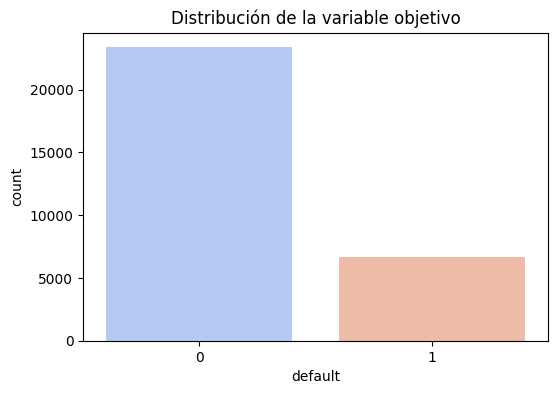

In [36]:
#Variable objetivo
plt.figure(figsize=(6, 4))
sns.countplot(x='default', data=df, palette='coolwarm')
plt.title('Distribución de la variable objetivo')
plt.show()

Hay muchos más 0 que 1. Es unn dataset desbalanceado.

Vamos a ver las distribuciones de las features categóricas que ya nos vienen dadas como numéricas

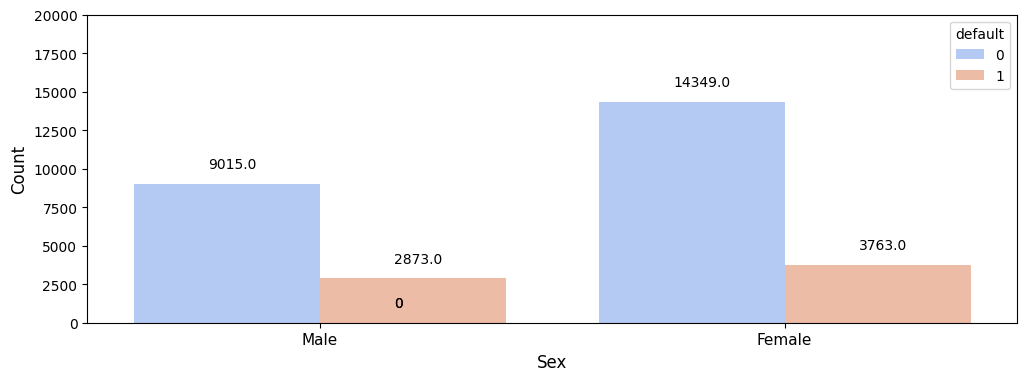

In [48]:
#Vamos a ver las distribuciones de las features categóricas que ya nos vienen dadas como numéricas
plt.figure(figsize=(12,4))

ax = sns.countplot(data = df, x = 'SEX', hue="default", palette = 'coolwarm')

plt.xlabel("Sex", fontsize= 12)
plt.ylabel("Count", fontsize= 12)
plt.ylim(0,20000)
plt.xticks([0,1],['Male', 'Female'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+1000))

plt.show()


In [ ]:
df.groupby('SEX')['default'].value_counts(normalize=True)

SEX  default
1    0          0.758328
     1          0.241672
2    0          0.792237
     1          0.207763
Name: proportion, dtype: float64

hombres hacen más default (24%) que mujeres (20%)

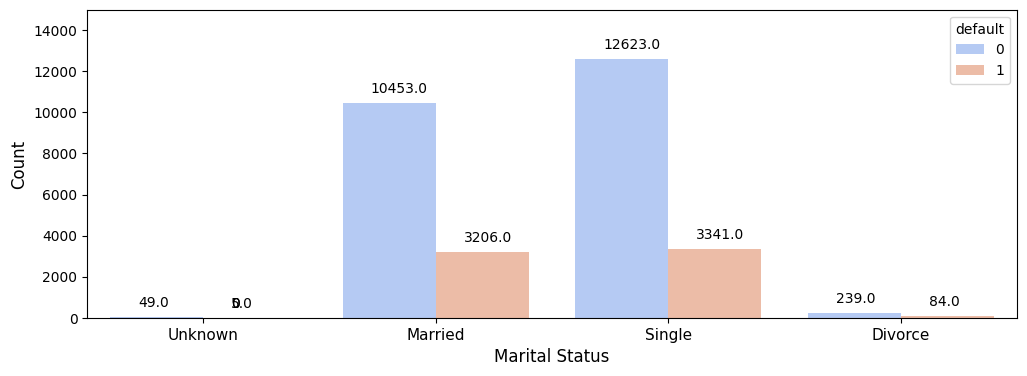

In [49]:
plt.figure(figsize=(12,4))

ax = sns.countplot(data = df, x = 'MARRIAGE', hue="default", palette = 'coolwarm')

plt.xlabel("Marital Status", fontsize= 12)
plt.ylabel("Count", fontsize= 12)
plt.ylim(0,15000)
plt.xticks([0,1,2,3],['Unknown', 'Married', 'Single', 'Divorce'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.12, p.get_height()+500))

plt.show()


In [39]:
df.groupby('MARRIAGE')['default'].value_counts(normalize=True)

MARRIAGE  default
0         0          0.907407
          1          0.092593
1         0          0.765283
          1          0.234717
2         0          0.790717
          1          0.209283
3         0          0.739938
          1          0.260062
Name: proportion, dtype: float64

Vemos que los divorciados suelen hacer más default.

C:\Users\hector\AppData\Local\Temp\ipykernel_27056\2500128350.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x = "MARRIAGE", y = "default", data = df, palette = 'coolwarm', ci = None)
C:\Users\hector\AppData\Local\Temp\ipykernel_27056\2500128350.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = "MARRIAGE", y = "default", data = df, palette = 'coolwarm', ci = None)


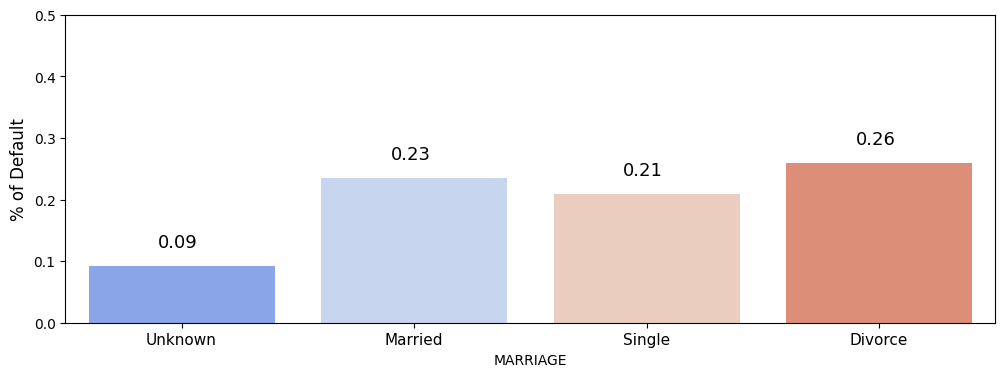

In [50]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "MARRIAGE", y = "default", data = df, palette = 'coolwarm', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2,3],['Unknown', 'Married', 'Single', 'Divorce'], fontsize = 11)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.03),fontsize=13)

plt.show()

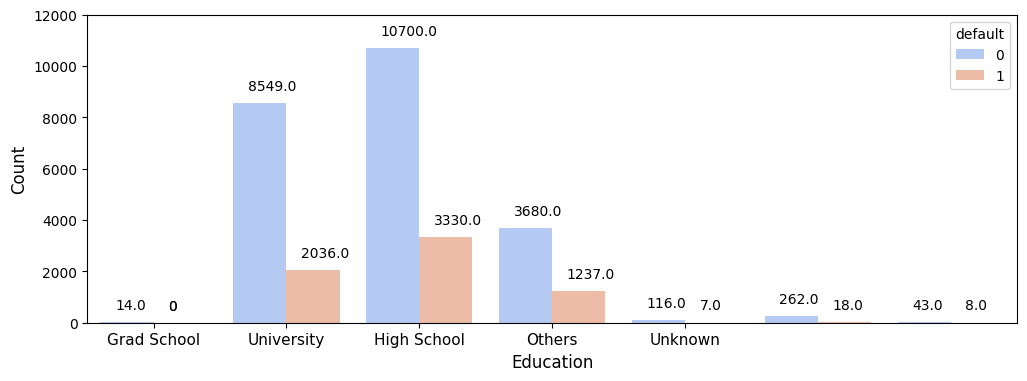

In [51]:
plt.figure(figsize=(12,4))

ax = sns.countplot(data = df, x = 'EDUCATION', hue="default", palette = 'coolwarm')

plt.xlabel("Education", fontsize= 12)
plt.ylabel("Count", fontsize= 12)
plt.ylim(0,12000)
plt.xticks([0,1,2,3,4],['Grad School','University','High School','Others','Unknown'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.11, p.get_height()+500))

plt.show()

In [42]:
df.groupby('EDUCATION')['default'].value_counts(normalize=True)

EDUCATION  default
0          0          1.000000
1          0          0.807652
           1          0.192348
2          0          0.762651
           1          0.237349
3          0          0.748424
           1          0.251576
4          0          0.943089
           1          0.056911
5          0          0.935714
           1          0.064286
6          0          0.843137
           1          0.156863
Name: proportion, dtype: float64

C:\Users\hector\AppData\Local\Temp\ipykernel_27056\1951077722.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x = "EDUCATION", y = "default", data = df, palette = 'coolwarm', ci = None)
C:\Users\hector\AppData\Local\Temp\ipykernel_27056\1951077722.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = "EDUCATION", y = "default", data = df, palette = 'coolwarm', ci = None)


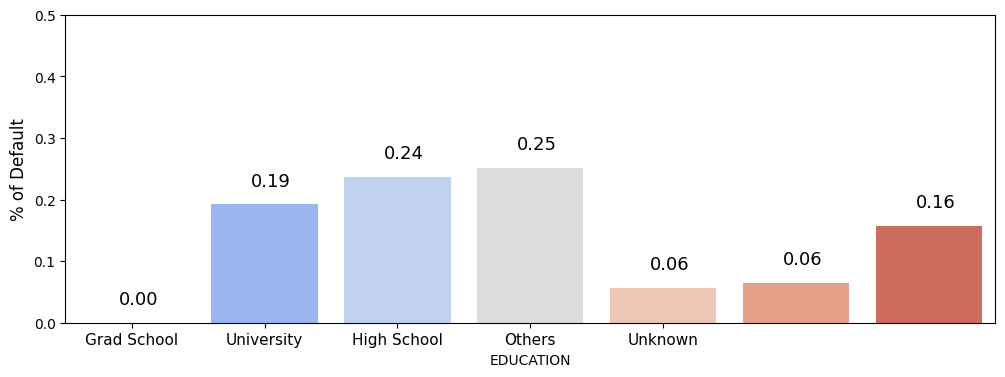

In [ ]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "EDUCATION", y = "default", data = df, palette = 'coolwarm', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2,3,4],['Grad School','University','High School','Others','Unknown'], fontsize = 11)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.03),fontsize=13)

plt.show()

In [46]:
df['AgeBin'] = pd.cut(df['AGE'],[20, 25, 30, 35, 40, 50, 60, 80])

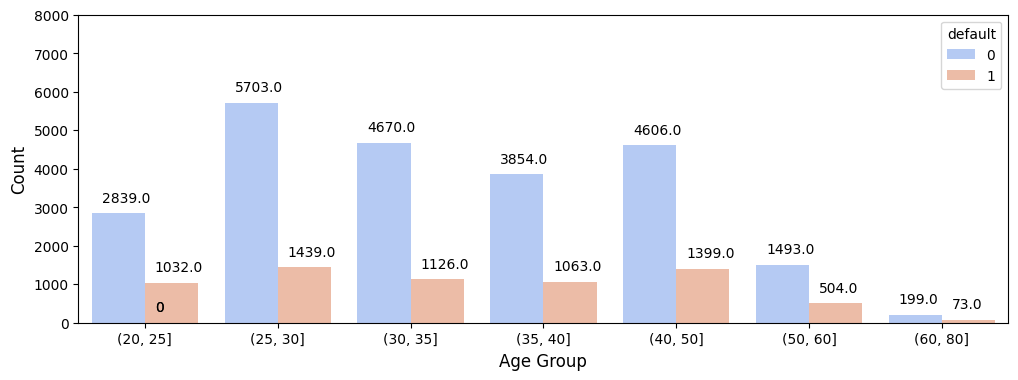

In [52]:
plt.figure(figsize=(12,4))

df['AgeBin'] = df['AgeBin'].astype('str')
AgeBin_order = ['(20, 25]', '(25, 30]', '(30, 35]', '(35, 40]', '(40, 50]', '(50, 60]', '(60, 80]']

ax = sns.countplot(data = df, x = 'AgeBin', hue="default", palette = 'coolwarm', order = AgeBin_order)

plt.xlabel("Age Group", fontsize= 12)
plt.ylabel("Count", fontsize= 12)
plt.ylim(0,8000)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.075, p.get_height()+300))

plt.show()

C:\Users\hector\AppData\Local\Temp\ipykernel_27056\3882890264.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x = "AgeBin", y = "default", data = df, palette = 'coolwarm', ci = None, order = AgeBin_order)
C:\Users\hector\AppData\Local\Temp\ipykernel_27056\3882890264.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = "AgeBin", y = "default", data = df, palette = 'coolwarm', ci = None, order = AgeBin_order)


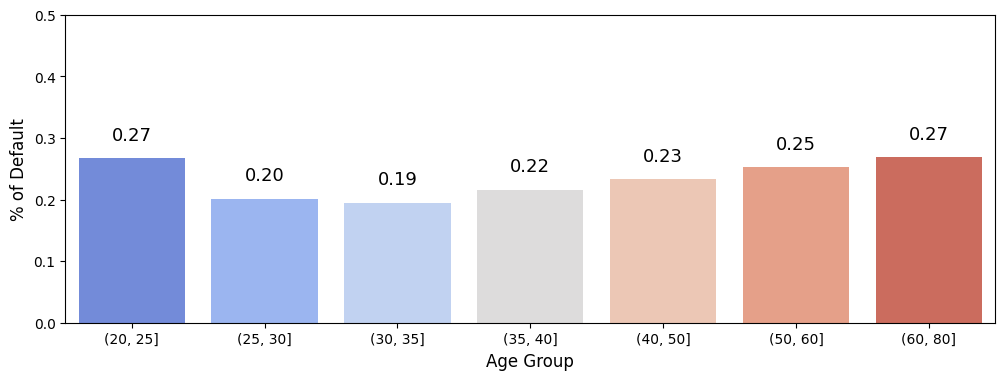

In [54]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "AgeBin", y = "default", data = df, palette = 'coolwarm', ci = None, order = AgeBin_order)

plt.xlabel("Age Group", fontsize= 12)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)

plt.show()

No tiene mucho sentido que los más mayores hagan default, a no ser que se mueran antes de devolver el crédito.

C:\Users\hector\AppData\Local\Temp\ipykernel_27824\752996262.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['AGE'], y='default', data=df, ci=None, palette='coolwarm')
C:\Users\hector\AppData\Local\Temp\ipykernel_27824\752996262.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['AGE'], y='default', data=df, ci=None, palette='coolwarm')


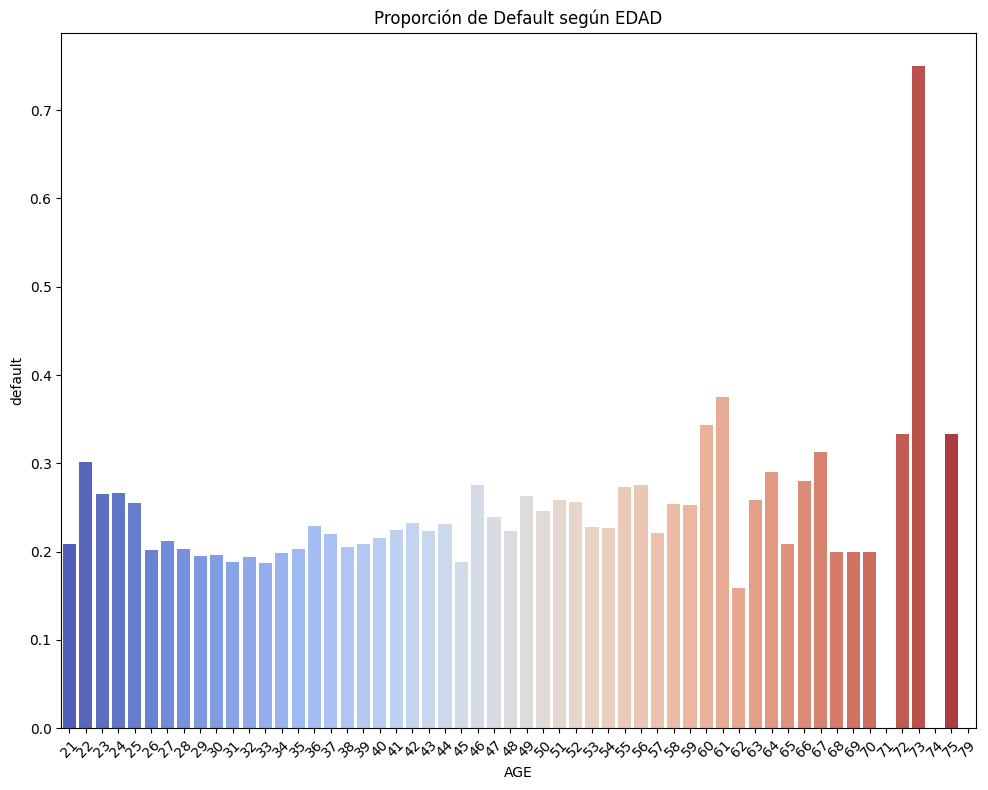

In [410]:
#Relación entre retrasos en pago y default con gráficos de barras
plt.figure(figsize=(10, 8))
sns.barplot(x=df['AGE'], y='default', data=df, ci=None, palette='coolwarm')
plt.title(f'Proporción de Default según EDAD')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Algo pasa a los 73 años... Se mueren antes de pagar?

In [413]:
display(df[df['AGE']==73])

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,AVG_PAY_REPAYMENT
387,388,80000.0,1,3,1,73,63144.0,65631.0,68875.0,70646.0,72870.0,75018.0,3500.0,4330.0,3500.0,3500.0,3500.0,5100.0,1,1.0
10699,10700,140000.0,1,2,1,73,135206.0,135316.0,134943.0,135772.0,138675.0,137197.0,5082.0,5008.0,5000.0,6016.0,5018.0,5264.0,0,0.0
29163,29164,360000.0,2,3,1,73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0
29179,29180,500000.0,2,2,1,73,0.0,2826.0,2652.0,2835.0,8896.0,3850.0,2826.0,2652.0,2835.0,8896.0,3850.0,711.0,1,0.0


***La edad puede ser un buen indicador de las probabilidades de default***

#### Estudio de variables numéricas.

Hacemos histogramas para tener una imagen global de las distribuciones de las variables numéricas que nos interesan. En nuestro caso, Pay_n, ya que más abajo haremos la matriz de corr y hemos visto que son las más correlacionadas con la target.

In [60]:
pay_columns = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

C:\Users\hector\AppData\Local\Temp\ipykernel_27056\2856911877.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='default', data=df, ci=None, palette='coolwarm')
C:\Users\hector\AppData\Local\Temp\ipykernel_27056\2856911877.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='default', data=df, ci=None, palette='coolwarm')
C:\Users\hector\AppData\Local\Temp\ipykernel_27056\2856911877.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='default', data=df, ci=None, palette='coolwarm')
C:\Users\hector\AppData\Local\Temp\ipykernel_27056\2856911877.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and s

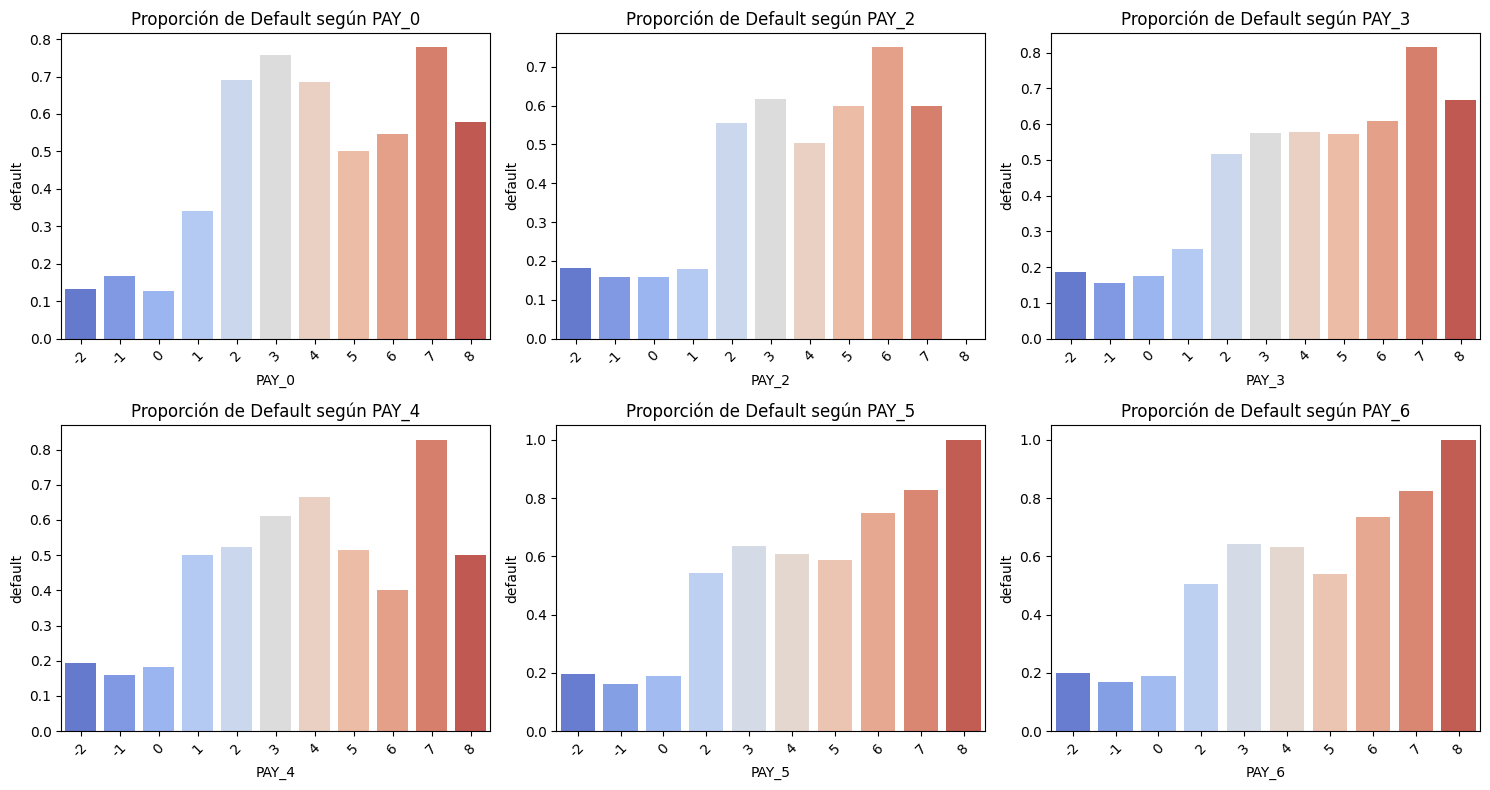

In [61]:
#Relación entre retrasos en pago y default con gráficos de barras
plt.figure(figsize=(15, 8))
for i, col in enumerate(pay_columns, 1):
    plt.subplot(2, 3, i)
    sns.barplot(x=col, y='default', data=df, ci=None, palette='coolwarm')
    plt.title(f'Proporción de Default según {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Hay cosas que no me cuadran.

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above.

Sin embargo, podemos observar que hay -2 y 0, que no tienen categoría para nosotros. En el data cleaning transformaré el -1, -2 a 0.

De todas formas, se puede apreciar que ***a medida que aumentan los meses de impago, la probabilidad de default es más alta***. El modelo debe encontrar la combinación ideal para prever el default. También podemos ver que las variables están muy correlacionadas entre sí y deberemos eliminar o construir una global

#### Matiz de correlación

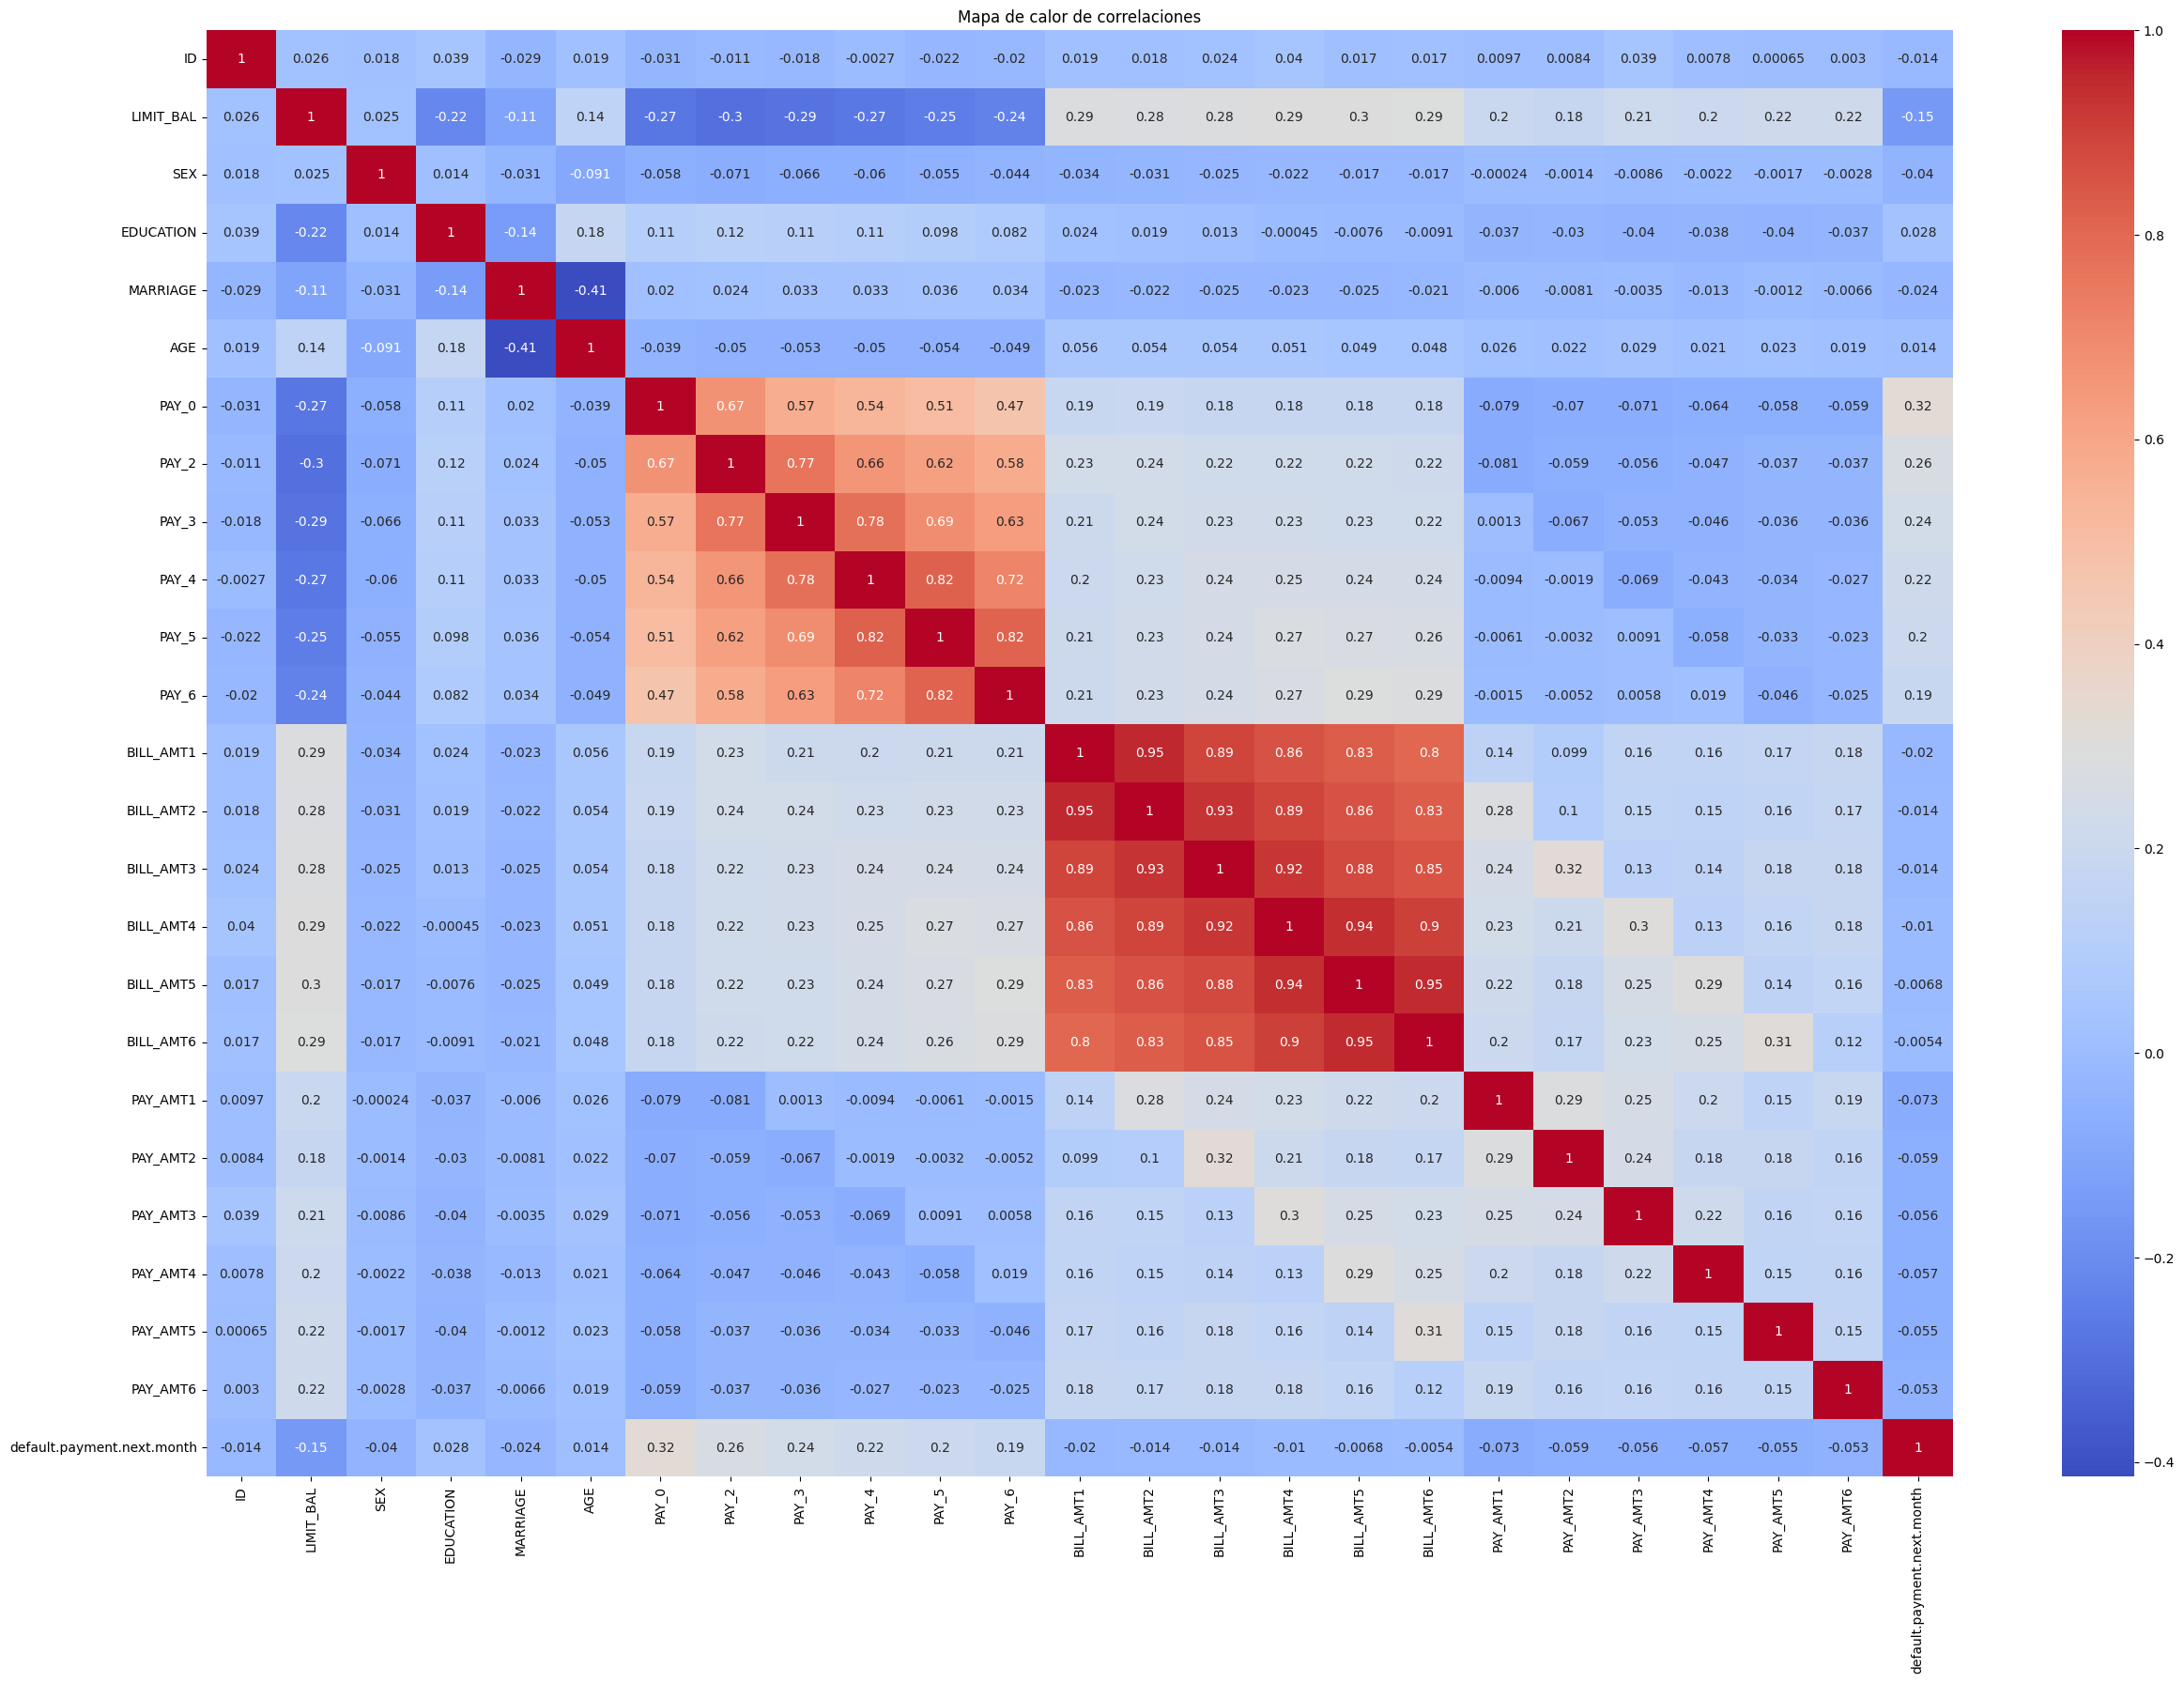

In [ ]:

plt.figure(figsize=(30, 20))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlaciones')
plt.show()


Lo que veo a primera vista es que la variable Y (Default payment) tiene ligera correlación con Pay_N. Va perdiendo fuerza a medida que la información de impago es más lejana. Pay_0 es el mes más reciente y suele tener la mayor influencia en el incumplimiento del mes siguiente.

### DATA CLEANING

Modificamos valores para facilitarle la vida al modelo

In [559]:
#Me pasas los -1 y -2 a 0 en las PAys
pay_columns = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
print(df[pay_columns].min())

for a in pay_columns:
    df[a] = df[a].map(lambda x: 0 if x == -1 or x == -2 else x)

print(df[pay_columns].min())

PAY_0   -2
PAY_2   -2
PAY_3   -2
PAY_4   -2
PAY_5   -2
PAY_6   -2
dtype: int64
PAY_0    0
PAY_2    0
PAY_3    0
PAY_4    0
PAY_5    0
PAY_6    0
dtype: int64


In [560]:
#Me pasas los niveles de educ 5 y 6 a 4(others)
print(df['EDUCATION'].max())

df['EDUCATION']=df['EDUCATION'].map(lambda x: 4 if x == 5 or x == 6 else x)

print(df['EDUCATION'].max())

6
4


### UNDERSAMPLING

Creo un df con undersampling para probar los modelos con esta característica.

In [561]:
# Combinar las clases 0 y 1 en un solo DataFrame
df_majority = df[df['default'] == 0]
df_minority = df[df['default'] == 1]

# Submuestro la clase mayoritaria
df_majority_undersampled = resample(df_majority, 
                                    replace=False,    # No se repite ningún dato
                                    n_samples=len(df_minority),  # Igualar el tamaño a la clase minoritaria
                                    random_state=42)

# Combinar el conjunto submuestreado con la clase minoritaria
df_balanced = pd.concat([df_majority_undersampled, df_minority])

### XGBOOST vs RF (sin modificar features).

In [562]:
# Rehacer la división de características y objetivo
X = df_balanced.drop(columns=['ID', 'default'])
y = df_balanced['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

c:\Users\hector\anaconda3\envs\marcos\lib\site-packages\xgboost\core.py:158: UserWarning: [18:41:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.66      0.74      0.70      1324
           1       0.71      0.61      0.66      1331

    accuracy                           0.68      2655
   macro avg       0.68      0.68      0.68      2655
weighted avg       0.68      0.68      0.68      2655

AUC-ROC: 0.6777639759306884


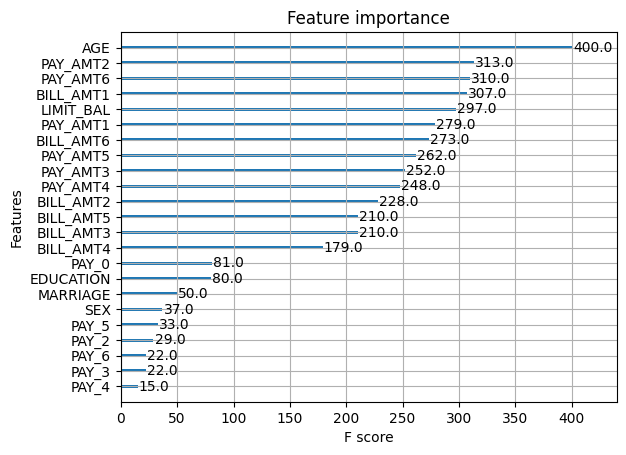

In [563]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Crear y entrenar el modelo sin scale_pos_weight porque los datos ya están balanceados
xgb_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42
)

xgb_model.fit(X_train, y_train)

# Evaluación
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred))
xgboost_raw_report= classification_report(y_test, y_pred)
xgboost_raw_AUC_ROC= roc_auc_score(y_test, y_pred)


# Importancia de las características
xgb.plot_importance(xgb_model, importance_type='weight')
plt.show()

              precision    recall  f1-score   support

           0       0.66      0.78      0.72      1324
           1       0.73      0.61      0.66      1331

    accuracy                           0.69      2655
   macro avg       0.70      0.69      0.69      2655
weighted avg       0.70      0.69      0.69      2655

AUC-ROC: 0.6917526744310096


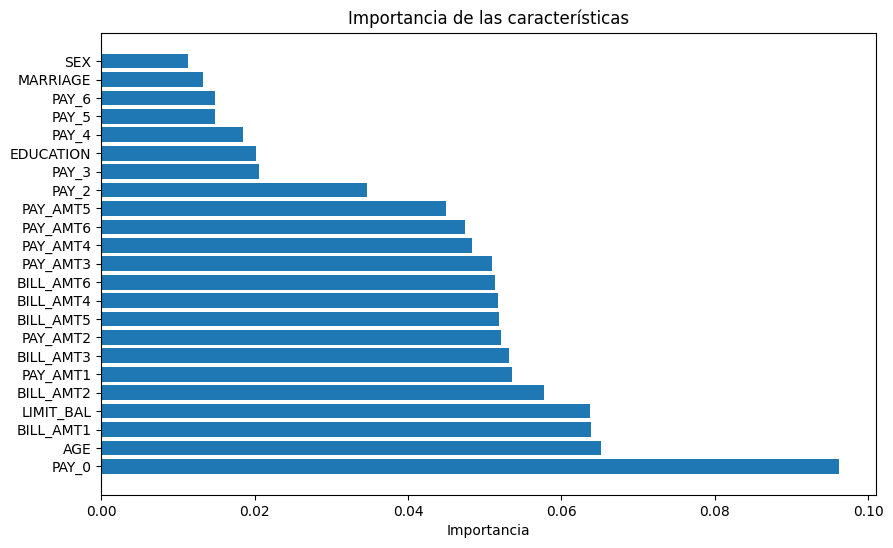

In [564]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# No es necesario usar class_weight porque los datos ya están balanceados
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train, y_train)

# Evaluación
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred))

rf_raw_report= classification_report(y_test, y_pred)
rf_raw_AUC_ROC= roc_auc_score(y_test, y_pred)

# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
plt.title('Importancia de las características')
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]  
plt.barh(range(X_train.shape[1]), importances[indices], align='center')
plt.yticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices])
plt.xlabel('Importancia')
plt.show()

### XGBOOST vs RF (con feature engineering).

Si hay variables altamente correlacionadas, es recomendable eliminar algunas de ellas.
¿Por qué? Aunque los árboles de decisión individuales en un Random Forest no se ven tan afectados por la multicolinealidad, sigue siendo mejor mejorar la eficiencia del modelo y evitar que unas pocas variables dominen la predicción.

***Si algunas variables tienen correlación cercana a 0 con la variable objetivo, podrían ser irrelevantes.***

Vamos a sumar todas las bills en una única variable y luego haremos lo mismo con las Pay_n, debido a la colinealidad que tienen entre ellas.

In [565]:
new_df = df_balanced.copy()
new_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
7510,7511,380000.0,2,3,2,31,0,0,0,0,...,11147.0,12483.0,13680.0,9240.0,15233.0,11202.0,12493.0,13748.0,18061.0,0
15325,15326,240000.0,2,2,1,35,0,0,0,0,...,5638.0,2582.0,4127.0,7375.0,4908.0,5638.0,2587.0,4127.0,4942.0,0
18666,18667,50000.0,2,1,2,23,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7494,7495,330000.0,1,1,2,32,0,0,0,0,...,141453.0,112633.0,121242.0,5500.0,4723.0,5500.0,4000.0,10700.0,4500.0,0
1239,1240,80000.0,2,2,1,35,0,0,0,0,...,396.0,396.0,396.0,9796.0,13443.0,396.0,396.0,0.0,396.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29991,29992,210000.0,1,2,1,34,3,2,2,2,...,2500.0,2500.0,2500.0,0.0,0.0,0.0,0.0,0.0,0.0,1
29994,29995,80000.0,1,2,2,34,2,2,2,2,...,77519.0,82607.0,81158.0,7000.0,3500.0,0.0,7000.0,0.0,4000.0,1
29997,29998,30000.0,1,2,2,37,4,3,2,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


hacemos media de todas las bills ya que tienen una correlación muy fuerte entre ellas.

In [566]:
new_df['avg_bill_amt'] = new_df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 
                                           'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1)

new_df.drop(columns=['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 
                          'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'], inplace=True)

Hacemos una única variable que aporte info de si tiene retrasos de pagos.

In [567]:
# Asignar un peso mayor a los meses más recientes
weights = [6, 5, 4, 3, 2, 1]  # Los pesos van de mayor a menor

# Multiplicar cada variable PAY_n por su peso respectivo y sumar
new_df['TOTAL_PAY_REPAYMENT'] = new_df[['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].multiply(weights, axis=1).sum(axis=1)

# Ahora puedes eliminar las columnas originales PAY_0, PAY_1, ..., PAY_5 si lo deseas
new_df = new_df.drop(columns=['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])

Vamos a hacer drop de las variables que tienen menor poder predictivo. El criterio es que tengan baja correlación con la target y que el feature importance sea bajo en el RF anterior

In [568]:
new_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,avg_bill_amt,TOTAL_PAY_REPAYMENT
7510,7511,380000.0,2,3,2,31,9240.0,15233.0,11202.0,12493.0,13748.0,18061.0,0,10920.000000,0
15325,15326,240000.0,2,2,1,35,7375.0,4908.0,5638.0,2587.0,4127.0,4942.0,0,5003.500000,0
18666,18667,50000.0,2,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0,388.666667,0
7494,7495,330000.0,1,1,2,32,5500.0,4723.0,5500.0,4000.0,10700.0,4500.0,0,137927.833333,0
1239,1240,80000.0,2,2,1,35,9796.0,13443.0,396.0,396.0,0.0,396.0,0,4552.833333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29991,29992,210000.0,1,2,1,34,0.0,0.0,0.0,0.0,0.0,0.0,1,2500.000000,48
29994,29995,80000.0,1,2,2,34,7000.0,3500.0,0.0,7000.0,0.0,4000.0,1,78488.833333,42
29997,29998,30000.0,1,2,2,37,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1,11749.333333,47
29998,29999,80000.0,1,3,1,41,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1,44435.166667,6


In [569]:
# Rehacer la división de características y objetivo
X = new_df.drop(columns=['ID', 'default'])
y = new_df['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

XGBoost

              precision    recall  f1-score   support

           0       0.67      0.74      0.70      1324
           1       0.71      0.63      0.67      1331

    accuracy                           0.68      2655
   macro avg       0.69      0.68      0.68      2655
weighted avg       0.69      0.68      0.68      2655

AUC-ROC: 0.6848915360188487


c:\Users\hector\anaconda3\envs\marcos\lib\site-packages\xgboost\core.py:158: UserWarning: [18:41:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


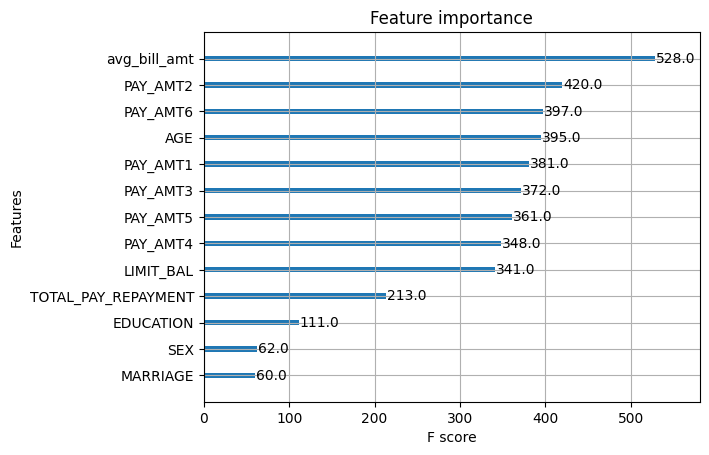

In [570]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Crear y entrenar el modelo sin scale_pos_weight porque los datos ya están balanceados
xgb_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42
)

xgb_model.fit(X_train, y_train)

# Evaluación
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred))


xgboost_feature_engineering_report= classification_report(y_test, y_pred)
xgboost_feature_engineering_AUC_ROC= roc_auc_score(y_test, y_pred)


# Importancia de las características
xgb.plot_importance(xgb_model, importance_type='weight')
plt.show()

RF

              precision    recall  f1-score   support

           0       0.65      0.78      0.71      1324
           1       0.73      0.59      0.65      1331

    accuracy                           0.68      2655
   macro avg       0.69      0.68      0.68      2655
weighted avg       0.69      0.68      0.68      2655

AUC-ROC: 0.6834882116210922


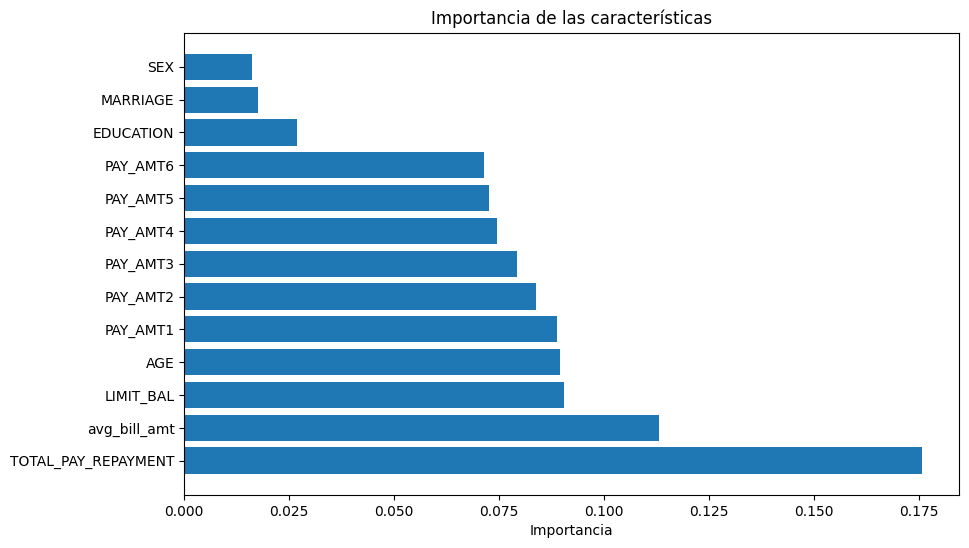

In [571]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# No es necesario usar class_weight porque los datos ya están balanceados
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train, y_train)

# Evaluación
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred))


rf_feature_engineering_report= classification_report(y_test, y_pred)
rf_feature_engineering_AUC_ROC= roc_auc_score(y_test, y_pred)


# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
plt.title('Importancia de las características')
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]  
plt.barh(range(X_train.shape[1]), importances[indices], align='center')
plt.yticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices])
plt.xlabel('Importancia')
plt.show()

### Resultados

In [575]:
print(xgboost_raw_report)
print(f'AUC_ROC:{xgboost_raw_AUC_ROC}')
print('----------------------------------------------------------')
print(xgboost_feature_engineering_report)
print(f'AUC_ROC:{xgboost_feature_engineering_AUC_ROC}')

              precision    recall  f1-score   support

           0       0.66      0.74      0.70      1324
           1       0.71      0.61      0.66      1331

    accuracy                           0.68      2655
   macro avg       0.68      0.68      0.68      2655
weighted avg       0.68      0.68      0.68      2655

AUC_ROC:0.6777639759306884
----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.67      0.74      0.70      1324
           1       0.71      0.63      0.67      1331

    accuracy                           0.68      2655
   macro avg       0.69      0.68      0.68      2655
weighted avg       0.69      0.68      0.68      2655

AUC_ROC:0.6848915360188487


In [576]:
print(rf_raw_report)
print(f'AUC_ROC:{rf_raw_AUC_ROC}')
print('----------------------------------------------------------')
print(rf_feature_engineering_report)
print(f'AUC_ROC:{rf_feature_engineering_AUC_ROC}')

              precision    recall  f1-score   support

           0       0.66      0.78      0.72      1324
           1       0.73      0.61      0.66      1331

    accuracy                           0.69      2655
   macro avg       0.70      0.69      0.69      2655
weighted avg       0.70      0.69      0.69      2655

AUC_ROC:0.6917526744310096
----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.65      0.78      0.71      1324
           1       0.73      0.59      0.65      1331

    accuracy                           0.68      2655
   macro avg       0.69      0.68      0.68      2655
weighted avg       0.69      0.68      0.68      2655

AUC_ROC:0.6834882116210922
